# Velocity and transport report
## Purpose
The present set of geostatistical, flow and trasnport simulations aims to determinate the conditions which trigger non-Fickian transport behaviour for Darcy flow in heterogeneous porous media. Moreover, some additional calibration tests will be carried out in the attempt of relating geostatistical metrics and transport parameters for the most popular upscaled models (e.g. MRMT or CTRW).  

## Content
In this report the preliminary results of a small simulation campaign conducted over 28 realizations charcterised by increasing correlation lengths are shown. Boundary conditions are no flow along the lateral boundaries, 1 Pa constant pressure on the inlet boundary and zero pressure gradient on the outlet boundary. The domain dimensions are 2x1x1 meters and the mesh resolution is 0.05 meters which makes the number of total cells summing up to $2 \cdot 10^6$. The domain is populated with a pluri-Gaussian random field which aims to reproduce the high contrast pattern between four permeability facies. Facies permeabilty takes four values equally spaced between $1 \cdot 10^7$ and $1 \cdot 10^{10} m^2/s$ . 

## Equations

### Spectral generation
\begin{equation} \label{eq:stoFouInt}
	Z(x) = \int_{-\infty}^{+\infty} e^{-2 \pi i \mathbf{k} x} \sqrt{S(\mathbf{k})} dW(\mathbf{k}).
\end{equation} 
where $\mathbf{k}$ are frequencies, $dW(\mathbf{k})$ is a complex-valued white noise random measure and $S(\mathbf{k})$ is the amplitude of the spectral measure.
This can be rewritten as:
\begin{equation} \label{eq:SFIsincos}
	Z(x) = \int_{-\infty}^{+\infty} \cos(2 \pi \mathbf{k} x) \sqrt{S(\mathbf{k})} dW(\mathbf{k}) + i \int_{-\infty}^{+\infty} \sin(2 \pi \mathbf{k} x) \sqrt{S(\mathbf{k})} dW(\mathbf{k}) .
\end{equation}
Periodicity problem:
$$ f(x_0)=\sum_{i=1}^{n_{freq}} cos\left(\frac{2\pi i x_0}{L}\right)=\sum_{i=1}^{n_{freq}} cos\left(2\pi i \left(\frac{x_0}{L} +1\right)\right)=\sum_{i=1}^{n_{freq}} cos\left(2\pi i \frac{x_0+x_1-x_0}{L}\right)=f(x_1) $$

- L shold be much longer than the domain length to avoid periodicity;
- item wavelength i/L needs to satisfy $4 \cdot L_{corr} < i/L < L_{corr}/4$.

### Darcy
\begin{equation} \label{eq:Darcy}
	\boldsymbol{V} = - \frac{\boldsymbol{k}}{\mu} (\nabla p + \rho g \nabla z)
\end{equation} 

### Advection-dispersion-reaction
\begin{equation} \label{eq:ADR}
	\frac{\partial (\phi c)}{\partial t} + \nabla \cdot (\boldsymbol{V}c) - \phi D \nabla^2 c = c_s R_s.
\end{equation} 

### Péclet number
\begin{equation}
    Pe = \frac{advective transport rate}{diffusive transport rate} = \frac{L \cdot u}{D}
\end{equation}

where $u$ is the flow velocity, $D$ is the hydraulic dispersion coefficient and $L$ is a characteristic length. At different length scales correspond different Péclet numbers:
- micro-Péclet for $L$ in the range of pore scale;
- meso-Péclet for $L$ in the range of the correlation length;
- macro-Péclet for $L$ in the range of the domain size.

## Breaktrough curve fitting
In this section we assume the transport to be Fickian hence its breakthrough curve (BTC) will be well described by the cumulative Inverse Gaussian distribution that is the analytical solution of the advection-dispersion equation. To prove or reject this hypothesis we estimate the parameters $\mu$ and $\lambda$ using the experimental BTC data, as if the population of the recorded concentration in time was drawn from a real Inverse Gaussian distribution. We then visually compare the empirical BTC with the analytical one for which the parameters $\mu$ and $\lambda$ were estimated using the experimental data. If the curves coincide the hypothesis is accepted otherwise it is rejected. An alternative method to estimate the distribution underlying the experimental data is the least square method. The function that is considered to compute the least square error is the analytical ADE solution for semi-infinite domain provided by Van Genuchten.  

### Cumulative Inverse Gaussian distributions
\begin{equation}
    F(x; \mu, \lambda) = \Phi \left( \sqrt{\frac{\lambda}{x}} \left( \frac{x}{\mu}-1 \right) \right) + \mathrm{e}^{\frac{2 \lambda}{\mu}} \Phi \left( -\sqrt{\frac{\lambda}{x}} \left( \frac{x}{\mu}+1 \right) \right)
\end{equation}

### Moments method: parameters estimation
$E[X] = \mu_1$

$Var[X] = \mu_2 - \mu_1^2 = \frac{\mu_1^3}{\lambda}$

$\mu_1 = \int_0^{+\infty} f(t) t dt = \int_0^{+\infty} F'(t) t dt = -\int_0^{+\infty} F dt + \left[ Ft \right]_0^{+\infty} = - \sum_{i=0}^{+\infty} F_i(t) \Delta t + F(t_{+\infty})t_{+\infty}$

$\mu_2 = \int_0^{+\infty} f(t) t^2 dt = \int_0^{+\infty} F'(t) t^2 dt = -2 \int_0^{+\infty} F t dt + \left[ Ft^2 \right]_0^{+\infty} = -2 \sum_{i=0}^{+\infty} F_i(t) t_i \Delta t + F(t_{+\infty})t_{+\infty}^2$

### Least sqaure method: analytical ADE solution
Following the analytical solution provided by Van Genuchten (Analytical solutions of the one-dimensional convective-dispersive solute transport equation, 1982) we consider its explicit approximation in the form of
\begin{equation}
	C(X, T) = C_0 A (X, T) 
\end{equation}
where if we fix the recording section on the outlet boundary $X = X_0$ then the coefficient becomes 
\begin{align}
	A(X_0, T) &= \frac{1}{2}erfc\left( \frac{X_0 - u_0 T}{2 \sqrt{D_0 T}} \right) + \frac{1}{2} exp \left( \frac{u_0 X_0}{D_0} \right) erfc \left( \frac{X_0 + u_0 T}{2 \sqrt{D_0 T}} \right) \\ 
	&+ \frac{1}{2} \left[ 2 + \frac{X_0 u_0}{D_0} + \frac{u_0^2 T}{D_0} \right] exp \left( \frac{u_0 X_0}{D_0} \right) erfc \left( \frac{X_0 + u_0 T}{2 \sqrt{D_0 T}} \right) \\ 
	&- \left( \frac{u_0^2 T}{\pi D_0} \right)^{1/2} exp \left[ \frac{u_0 X_0}{D_0} - \frac{(X_0 + u_0 T)^2}{4 D_0 T} \right].
\end{align}

## Velocity and mechanical dispersion from BTC moments
Following the paper of $\textit{Yu et al. 1999}$, we computed the velocity and the mechanical dispersion coefficient from the statistical moments $\mu_1$ and $\mu_2$. According to the aforementioned paper, the flow velocity is
$$v = \frac{x}{\mu_1}$$
while the hydraulic dispersion is
$$D_{mec} = \frac{Var[X] v^3}{2x} = \frac{x^2}{2 \lambda}.$$
Mechanical dispersion and correlation lengths in the longitudinal direction show a positive trend while in the transversal directions no relevant trend appears. The average velocity from the stastical moments falls within one magnitude order if compared with the average velocity computed thorugh OpenFOAM. The hydrodynamic dispersion is given by the sum of the molecular diffusion with the mechanical dispersion:
\begin{equation}
    D = D_{mol}+D_{mec}
\end{equation}

### Mechanical dispersion index (alpha)
\begin{equation}
    \alpha = \frac{D_{mec}}{v}
\end{equation}

TS1


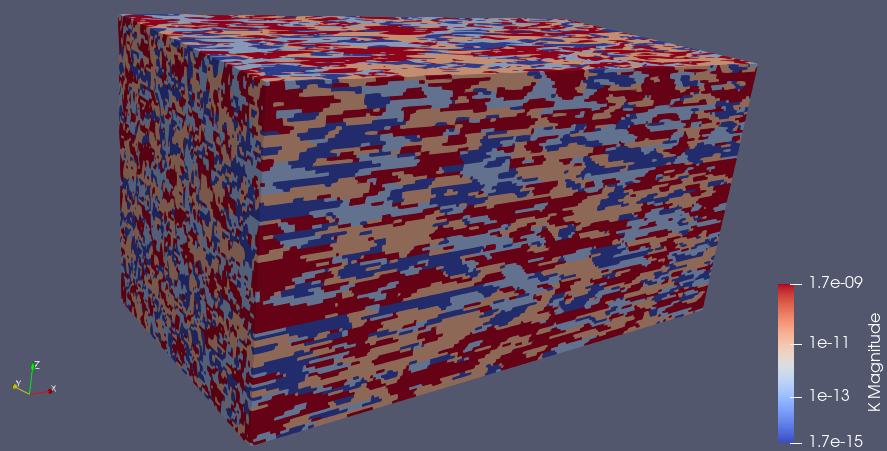

TS2


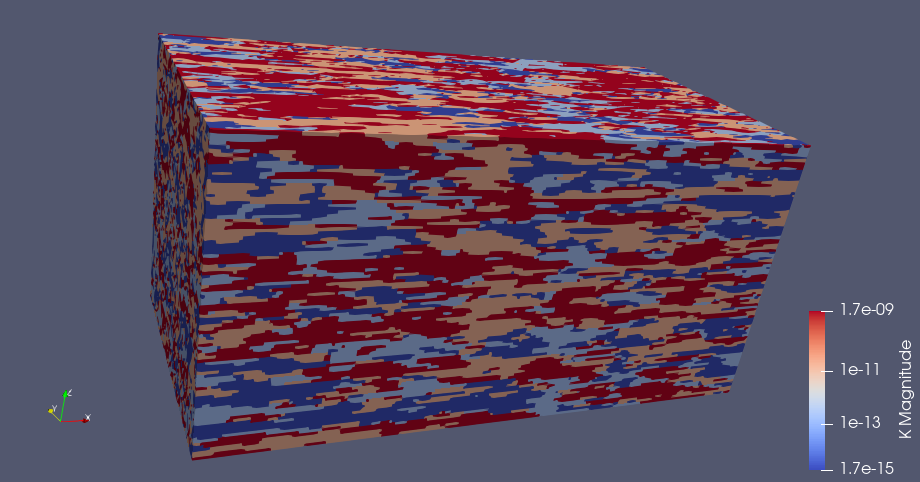

TS3


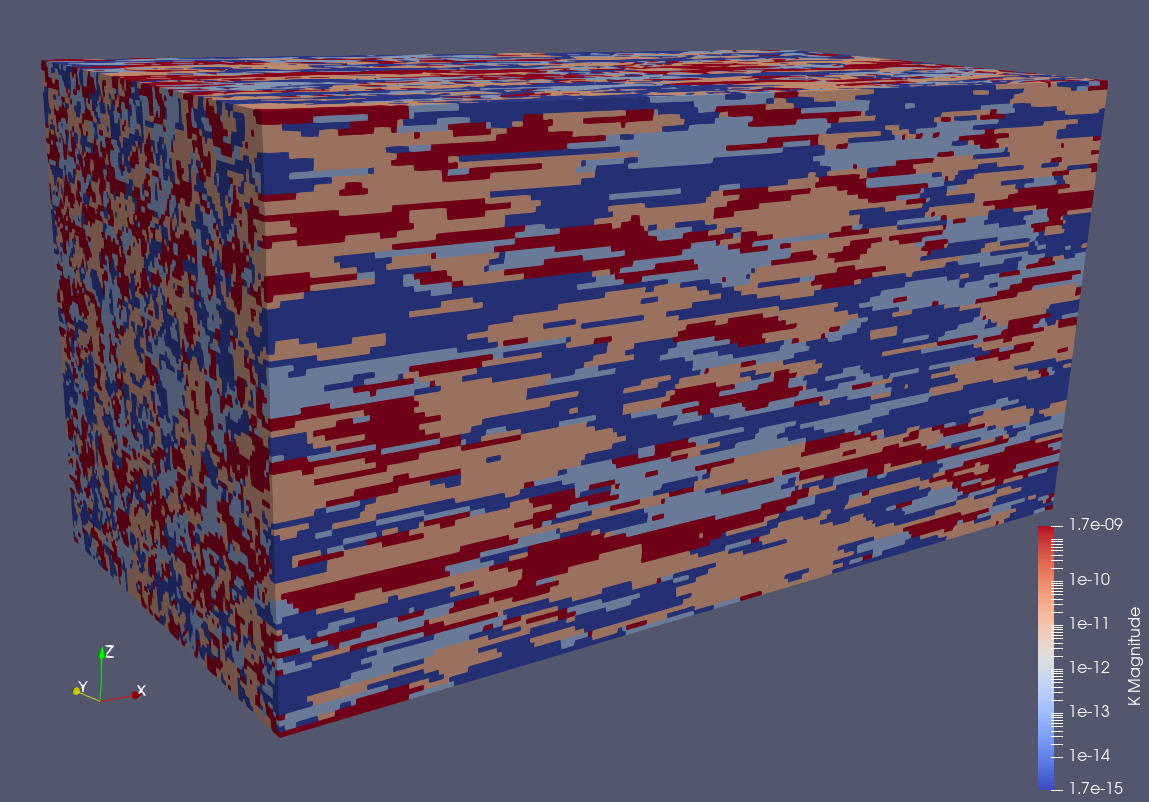

TS4


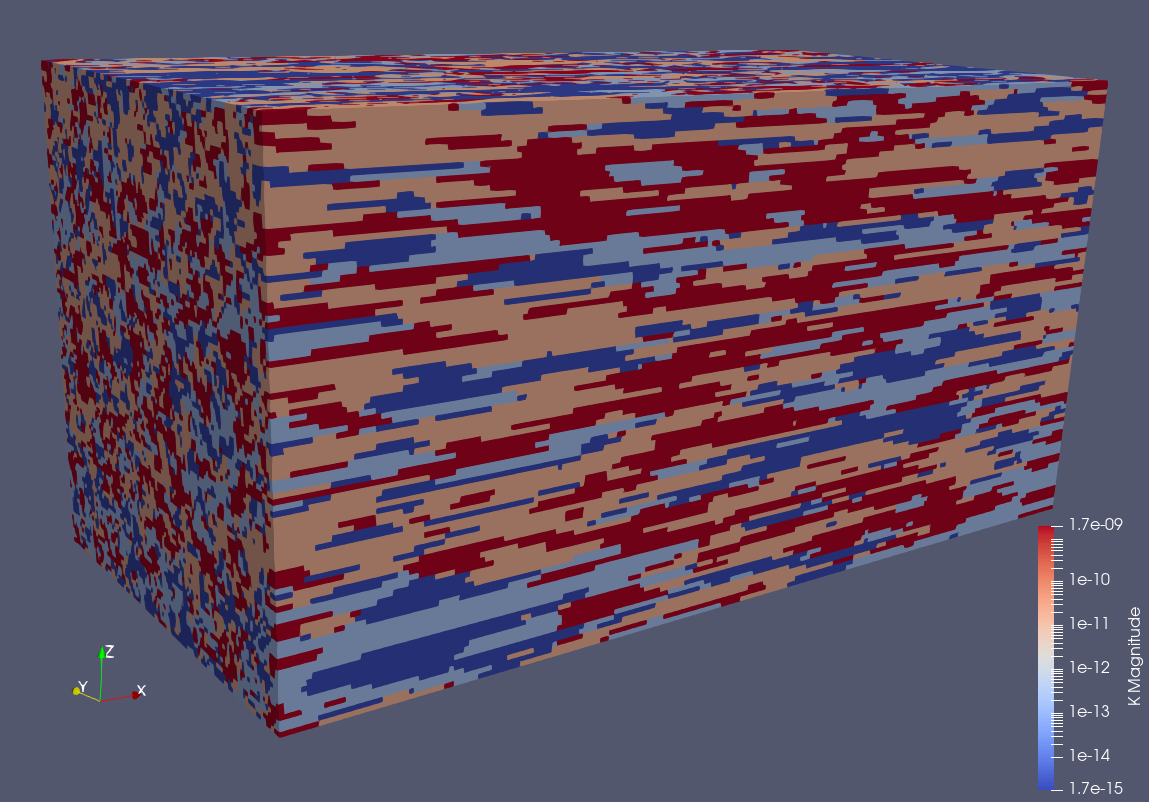

In [2]:
from IPython.display import Image
#Herten = Image(filename="/data/PGSFlowTransport/tutorials/RESULTS/Herten/Herten9/images/Herten10facies.png")
#print("Herten_10_facies")
#display(Herten)

k1Field = Image(filename="/data/PGSFlowTransport/tutorials/RESULTS/stopConcAdapTmstp_3/images/K1field.png")
k2Field = Image(filename="/data/PGSFlowTransport/tutorials/RESULTS/stopConcAdapTmstp_3/images/K2field.png")
k3Field = Image(filename="/data/PGSFlowTransport/tutorials/RESULTS/stopConcAdapTmstp_3/images/K3field.png")
k4Field = Image(filename="/data/PGSFlowTransport/tutorials/RESULTS/stopConcAdapTmstp_3/images/K4field.png")
print("TS1")
display(k1Field)
print("TS2")
display(k2Field)
print("TS3")
display(k3Field)
print("TS4")
display(k4Field)

#ts1 = Image(filename="/home/pmxep5/OneDrive/Nottingham/Write/VIVA/VIVA_2nd_year/images/veLcorr/ts1K.png", width=500, height=500)
#ts10 = Image(filename="/home/pmxep5/OneDrive/Nottingham/Write/VIVA/VIVA_2nd_year/images/veLcorr/ts10K.png", width=500, height=500)
#ts20 = Image(filename="/home/pmxep5/OneDrive/Nottingham/Write/VIVA/VIVA_2nd_year/images/veLcorr/ts20K.png", width=500, height=500)
#ts30 = Image(filename="/home/pmxep5/OneDrive/Nottingham/Write/VIVA/VIVA_2nd_year/images/veLcorr/ts30K.png", width=500, height=500)
#display(ts1) 
#display(ts10)
#display(ts20)
#display(ts30)

============= SIMULATION 1 =============

GEOSTATISTICAL METRICS
Gaussian Random Field generated

---- Statistics random field ---
CorrLengths: (0.4 0.1 0.1)
Mean: -1.04604e-15
Var: 1
--------------------------------


Cannot print logStats as the field takes non-positive values

Postprocessing

truncation rule applied
field values: 4(1e-09 1e-11 1e-13 1e-15)
volumes: 4(0.291226 0.288416 0.208967 0.21139) 12
thresholds on GRF1: 1(0)
thresholds on GRF2: 1(0.2)

Writing the Random Field

---- Statistics random field ---
CorrLengths: (0.4 0.1 0.1)
Mean: 2.94132e-10
Var: 2.04742e-19
--------------------------------


---- Statistics log of random field ---
CorrLengths: (0.4 0.1 0.1)
Mean: -26.8966
Var: 26.0811
------------------------------------

Effective longitudinal permeability Kx,eff [m2] = 0.000000000149763 

FLOW METRICS
Mean Vx Vy Vz = 0.000007488 -0.000000049 0.000000023
Estimated mean Vx = 0.000000489 

Péclet: 
  Macro = (149762.60 -485.77 230.57) 
  Meso = (29952.52 -48.58 23.

Effective longitudinal permeability Kx,eff [m2] = 0.000000000084156 

FLOW METRICS
Mean Vx Vy Vz = 0.000004208 -0.000000321 -0.000000097
Estimated mean Vx = 0.000000426 

Péclet: 
  Macro = (84156.40 -3209.12 -965.25) 
  Meso = (21039.10 -1604.56 -482.63) 

TRANSPORT METRICS
mu_1 = 4699082.479446 
mu_2 = 97620647355961.000000 
Inv Gau lambda = 1373619.391923 
alpha_estimatedMeanVx = 3.420949 
alpha_meanVx = 0.346024 

Dispersion: 
  Molecular = 0.000000000 
  Estimated mechanical = 0.000001 
  Estimated hydrodynamic = 0.000001 

Computed ||c|| = 728.261342 
Estimated ||c|| = 740.157567 



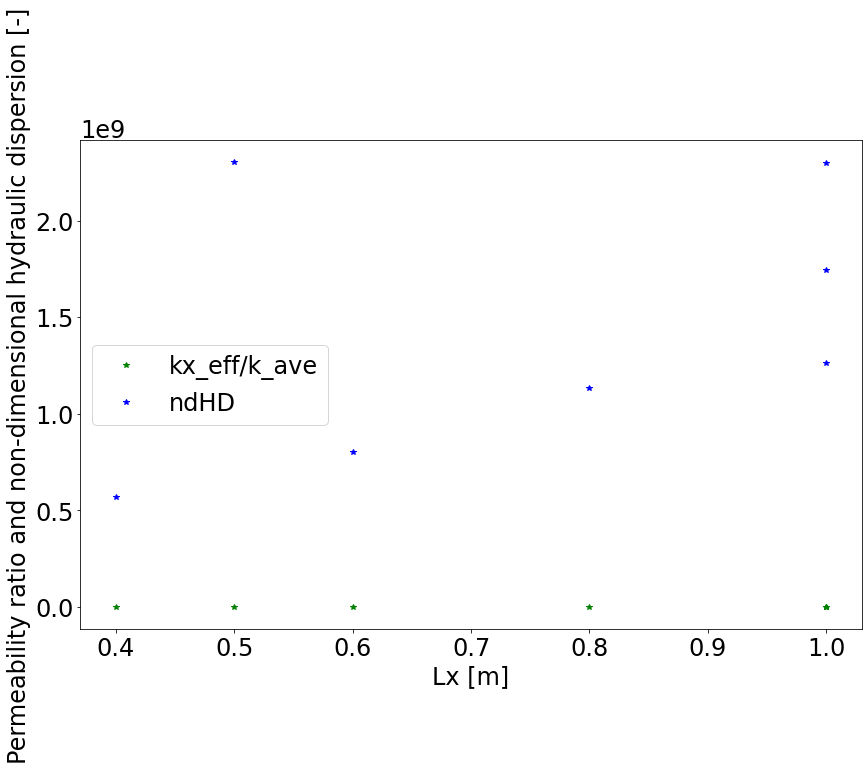

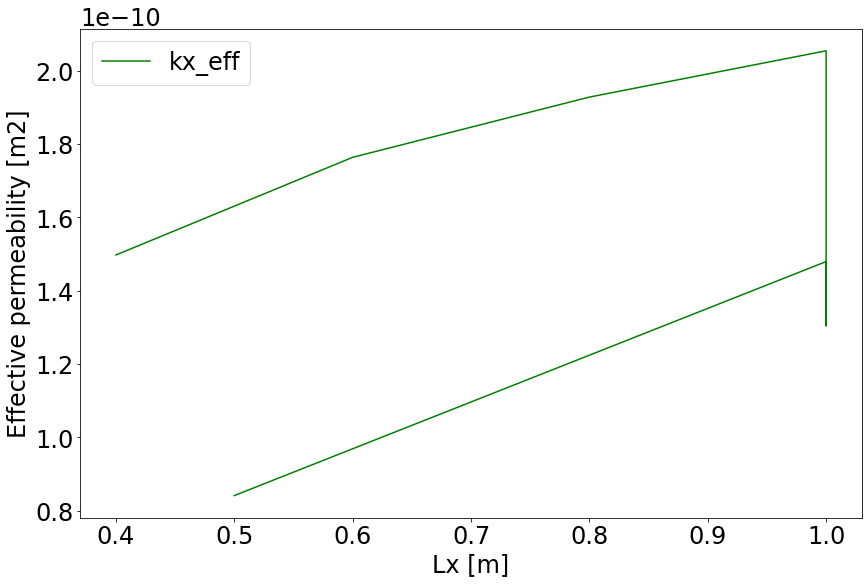

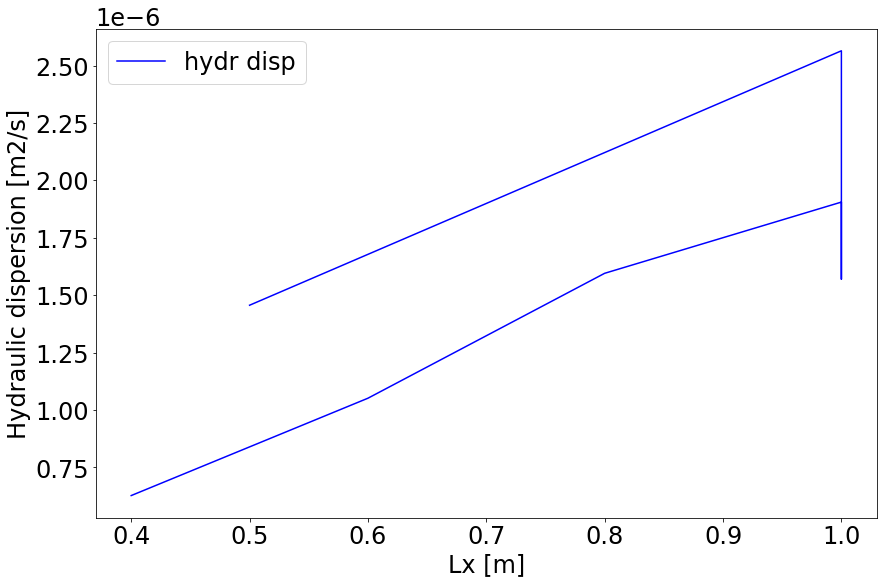

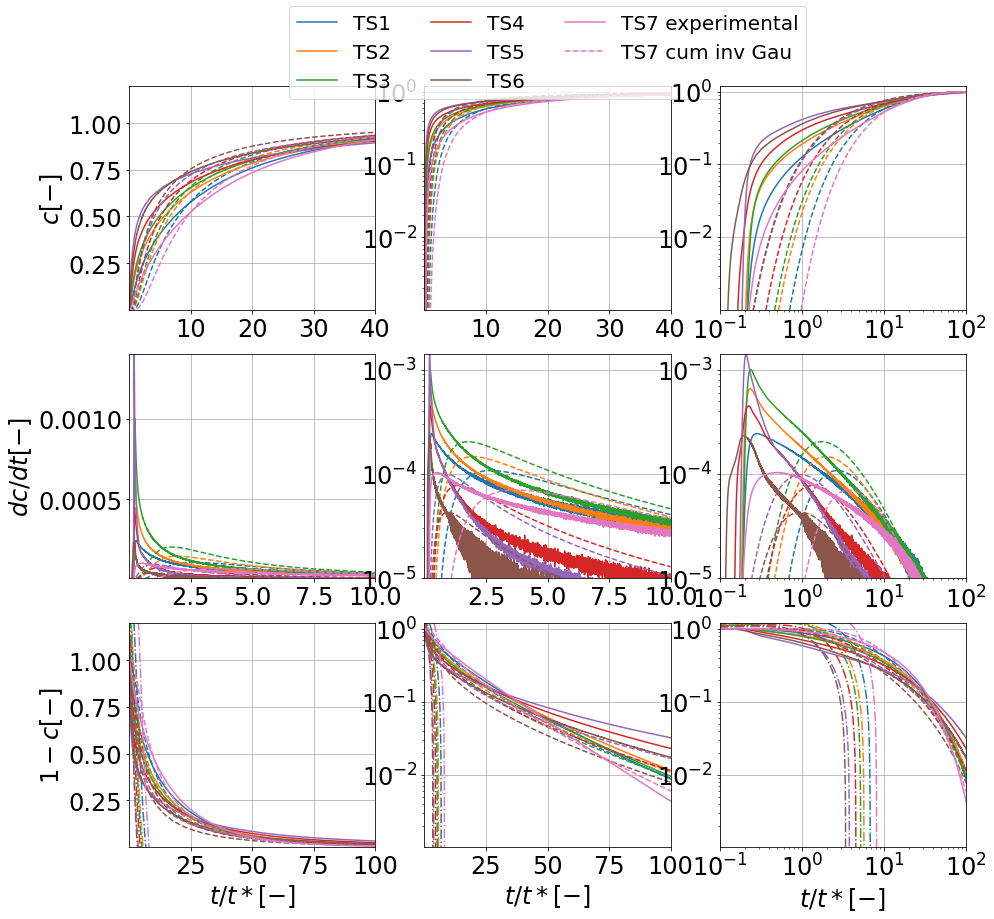

In [2]:
#%run -i /home/pmxep5/OpenFOAM/pmxep5-8/PGSFlowTransport/etc/Python/plotKVsLcorr.py
#%run -i /home/pmxep5/OpenFOAM/pmxep5-8/PGSFlowTransport/etc/Python/simAnalyser.py
#%run -i /data/PGSFlowTransport/etc/Python/simAnalyserHoriz.py
%run -i /data/PGSFlowTransport/etc/Python/simAnalyser9plots.py
#%run -i /home/pmxep5/OpenFOAM/pmxep5-8/PGSFlowTransport/etc/Python/corrFunction.py
#%run -i /home/pmxep5/OpenFOAM/pmxep5-8/PGSFlowTransport/etc/Python/plotVvsLcorr.py
#%run -i /home/pmxep5/OpenFOAM/pmxep5-8/PGSFlowTransport/etc/Python/plotMDvsCL.py
#%run -i /home/pmxep5/OpenFOAM/pmxep5-8/PGSFlowTransport/etc/Python/plotMDvsV.py
#%run -i /home/pmxep5/OpenFOAM/pmxep5-8/PGSFlowTransport/etc/Python/plotALPHAvsCLvsPECLET.py
#%run -i /data/PGSFlowTransport/etc/Python/corrFunction.py
#%run -i /data/PGSFlowTransport/etc/Python/LeastSq_constrained.py

# Paths
# luin67272: /home/pmxep5/OpenFOAM/pmxep5-7/PGSFlowTransport/etc/Python
# gercphd: /data/PGSFlowTransport/etc/Python/